## Introduction

Data visualization is as much about the art of reaching the content consumers, as about the science of deriving statistical insights from data. The intent of this chapter is to acquire the practical knowledge of the strengths and limitations of various visualization techniques, such that you can easily balance this science and art. Combining this knowledge with the techniques learnt in the first chapter of this courseware will help you make stellar plots that are both meaningful and attractive.

## Learning outcomes

This chapter is a primer on the different types of visualization and the contexts in which they are most effective. Using seaborn, altair, and bokeh, you will learn to create a variety of plots and become proficient in selecting the right kind of visualization for the most suitable representation of your data.
- <b>Learn to create plots that present global patterns in data</b>: scatter plots revisited; heatmaps and hexagonal binning plots; contour plots, line plots, area plots, and 3D surface plots.
- <b>Learn to create plots that present summary statistics of your data</b> histograms revisited; simple, stacked and grouped bar plots; pie charts; box plots and violin plots.

## Creating plots that present global patterns in data

In this section, we will study plots that present the global patterns in data -- i.e. plots which show the variance in individual features in the data, as well as how different features present in data vary with respect to each other. 

Let’s start with a single feature. Consider the example of the 'mpg' dataset from seaborn. Here's what the dataset looks like:

In [1]:
import seaborn as sns

# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
print(mpg_df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


The dataset was originally used to study the relationship of mileage -- Miles Per Gallon (MPG) -- with different features in the dataset. Hence the name, mpg!

### Histograms

The first type of plot we are going to generate is called a histogram.

<div class="alert-info">
    <b>What is a histogram?</b>: A histogram of a feature is a plot with the range of the feature on the x-axis, and the count of data points whose the feature in the corresponding range on the y-axis. 
</div>

To generate a histogram of vehicle mileages (mpg), we need to write a simple code like below:

'\n# histogram using altair\nalt.Chart(df).mark_bar().encode(\n    alt.X("mpg", bin=True),\n    y=\'count()\',\n)\n\n# histogram using bokeh\n'

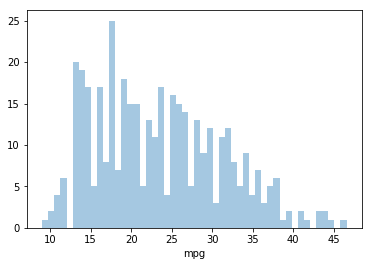

In [2]:
# import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt

# histogram using seaborn
ax = sns.distplot(mpg_df.mpg, bins=50,kde=False)

'''
# histogram using altair
alt.Chart(df).mark_bar().encode(
    alt.X("mpg", bin=True),
    y='count()',
)

# histogram using bokeh
'''

That’s pretty neat. Looking at the histogram, even a naive viewer immediately gets a picture of the distribution of the feature (mileages of the vehicles in our dataset). Specifically, two observations are important in a histogram:
- what values does the feature take more frequently than others, and 
- are there any outliers in the data.

### Scatter plots

The next type of plot we will generate is called a scatter plot.

<div class="alert-info">
    <b>What is a scatter plot?</b>: A scatter plot is a simple plot presenting the values of two features in a dataset. Each datapoint is represented by a point with x-coordinate as the value of the first feature, and y-coordinate as the value of the second feature. 
</div>

Suppose we want to examine the relationship between weight and mileage (mpg) of the vehicles. We can do this by generating a scatterplot of the two features as in the code below.

'\n# altair 2-D scatter plot \nimport altair as alt\nimport numpy as np\nimport pandas as pd\n\nx = np.arange(100)\nsource = pd.DataFrame({\n  \'x\': x,\n  \'f(x)\': np.sin(x / 5)\n})\n\nalt.Chart(source).mark_line().encode(\n    x=\'x\',\n    y=\'f(x)\'\n)\n\n# bokeh 2-D scatter plot \nimport numpy as np\n\nfrom bokeh.plotting import figure, show, output_file\n\nN = 4000\nx = np.random.random(size=N) * 100\ny = np.random.random(size=N) * 100\nradii = np.random.random(size=N) * 1.5\ncolors = [\n    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)\n]\n\nTOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"\n\np = figure(tools=TOOLS)\n\np.scatter(x, y, radius=radii,\n          fill_color=colors, fill_alpha=0.6,\n          line_color=None)\n\noutput_file("color_scatter.html", title="color_scatter.py example")\n\nshow(p)  # open a browser\n'

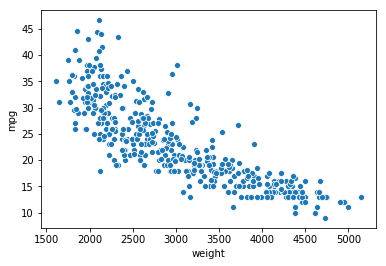

In [3]:
# seaborn 2-D scatter plot 
ax = sns.scatterplot(x="weight", y="mpg", data=mpg_df)

'''
# altair 2-D scatter plot 
import altair as alt
import numpy as np
import pandas as pd

x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)
})

alt.Chart(source).mark_line().encode(
    x='x',
    y='f(x)'
)

# bokeh 2-D scatter plot 
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser
'''

We can also generate a scatterplot for another feature, model_year, with mpg.

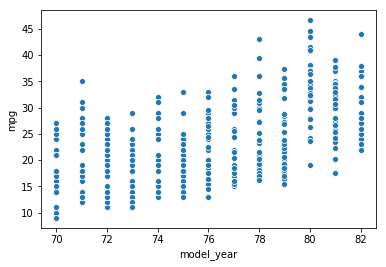

In [4]:
# seaborn 2-D scatter plot 
ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)

### Line plots

In our last example of the model_year and mileage, we saw that the datapoints only take discrete values between 71 and 82. When we have a numerical feature like this, drawing a line plot is a good idea. We can draw a simple line plot showing model_year and mileage (mpg) with the following code:

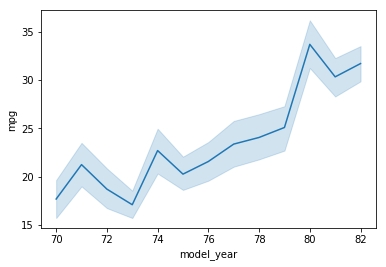

In [5]:
# seaborn line plot code
ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df)

# altair line plot code


# bokeh line plot code

<div class="alert-info">
    <b>Interpretation of line plot</b>: TODO. 
</div>

Now consider example of the flights dataset from seaborn.

In [6]:
flights_df = sns.load_dataset("flights")
print(flights_df.head())

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


Suppose you want to look at how the number of passengers is varying across years in each month. How would you display this information?

One option is to draw multiple line plots in a single figure. For example, let's look at the line plots for the months of December and January across different years. Data for January is shown with green color, and data for December is shown with red.

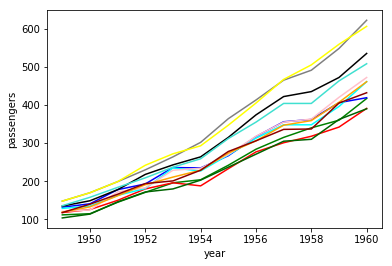

In [10]:
#flights_df = flights_df.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights_df)

# line plots for the planets dataset
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='January'], color='green')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='February'], color='red')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='March'], color='blue')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='April'], color='cyan')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='May'], color='pink')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='June'], color='black')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='July'], color='grey')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='August'], color='yellow')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='September'], color='turquoise')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='October'], color='orange')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='November'], color='darkgreen')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='December'], color='darkred')

With just a few groups, the figure is getting crowded. Thus, for certain scenarios, line plots are neither appealing nor useful. So what is the alternative for our use case? 

### Heatmaps

Enter heatmaps.

<div class="alert-info">
    <b>What is a heatmap?</b>: Describe heatmap in own words
</div>

We can generate a heatmap for our planets with the simple code below:

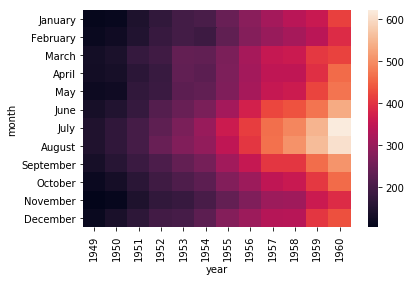

In [12]:
#flights_df.drop_duplicates(['number','year'],inplace=True)

# heatmap code with seaborn
df_pivoted = flights_df.pivot("month", "year", "passengers")
ax = sns.heatmap(df_pivoted)


A heatmap is a great tool to visualize high-dimensional data and even tease out features that are particularly variable across different class. In our example, feature x appears significantly different between students with high and low grade, whereas feature y is less significant. This tells us something about effective methods of learning. Now that’s a cool finding from a simple visualization! 

Plotting heatmaps is a very fun thing to explore, and there are lots of options available to tweak with the parameters. You can learn more about them here. [provide reference for heatmaps with seaborn/pandas]. However, we will only mention a couple of important parameters here. The distance function parameter (euclidean, manhattan, ...), and the clustering option parameter (row/column/?). 

Choice of the distance parameter depends on … Example.

Choice of the clustering option parameter depends on … example.

### Hexagonal binning plots
There’s also a fancier version of heatmaps, called hexabin plot. This little code can do it for you. It’s rarely used, so we won’t dive deeper into it. :)


In [8]:
## hexagonal binning plot

### Contour plots
Lastly, suppose that we are given data of <insert example, e.g radiation around a cellphone>. A contour plot can help present this in a simple and intuitive manner: 

In [9]:
## contour plot code

### Exercise
Are step-by-step practical elements that employ the concept in action.
Each exercise should have testable outcome and provide a final output, either a screenshot or a terminal output.
Each step should be an instruction for the user to perform.
A topic can have 1 or more exercises.


### Assessment Questions 
(12-18 MCQs)

### Topic summary
xyz

## Creating plots that present summary statistics of your data

### Histograms revisited

Let’s revisit our example of plotting a histogram. Although the histogram shows us the distribution of the feature in the data, we can make the plot more interesting and effective by showing some summary statistics in the same plot. Let’s add the mean and median first.
<code for adding mean/median in the histogram>

### Box plots

Now, suppose we want to know these summary statistics classified by another feature y. A popular way to show this information is to use boxplots. This is very easy to do with the seaborn library:

In [ ]:
## <code for box plots>

<div class="alert-info">
    <b>Interpretation of a boxplot</b>: xyz xyz xyz
</div>

### Violin plots

If you think about it, boxplots are a way to show summary statistics of multiple classes in a single plot. What if we could show entire histograms corresponding to multiple classes in the same plot? Violin plots are designed to do exactly this. 

In [ ]:
## code for violinplots

<div class="alert-info">
    <b>Interpretation of a violinplot</b>: xyz xyz xyz
</div>

### Bar plots

Consider the example of . We can show the number of instances of each class using a bar plot.

In [ ]:
## code

Now, what if we want to also show … We can do this using a grouped bar chart. 

However, since the feature … constitutes ... , it is helpful to show these subclasses on top of each other. We can do this using a stacked bar chart. 
What’s more, the stacked bar chart can be vertical or horizontal.

Feel free to play around with more variations as per … <reference>

### Exercise
Are step-by-step practical elements that employ the concept in action.
Each exercise should have testable outcome and provide a final output, either a screenshot or a terminal output.
Each step should be an instruction for the user to perform.
A topic can have 1 or more exercises.

### Assessment questions
Assessment Questions (12-18 MCQs)

### Topic summary
xyz

## Chapter-level Activity

We’ll continue to work with the World University Rankings dataset from Kaggle. As a visualization specialist, your task is to create two plots: (1) a plot using an appropriate visualization technique that best presents any global pattern in the data, and (2) a plot using an appropriate visualization technique that best presents a summary statistic of your choice in the data. This exercise is broadly defined on purpose so that the reader is encouraged to use their creativity and skills in bringing out important insights from data.

## Chapter-level Summary

Chapter-level Quiz (36+ MCQs)